# Support for SD modes in .stmx format

In [1]:
from asdm import sdmodel

### Example 1: Simulate .stmx model

### Functionalities tested:

- Load `.stmx` model
- Support for arrays
- Export simulation result as pandas `DataFrame`

In [2]:
model = sdmodel(from_xmile='Model_goal_gap_array.stmx')
model.simulate()

In [3]:
result = model.export_simulation_result(format='df')
result

,"Stock[1, First]","Stock[1, Second]","Stock[2, First]","Stock[2, Second]",Goal,"Gap[1, First]","Gap[1, Second]","Gap[2, First]","Gap[2, Second]","AT[1, First]","AT[1, Second]","AT[2, First]","AT[2, Second]","Flow[1, First]","Flow[1, Second]","Flow[2, First]","Flow[2, Second]"
0,100.000000,100.000000,100.000000,100.000000,20.0,-80.000000,-80.000000,-80.000000,-80.000000,1.0,3.0,5.0,7.0,-80.000000,-26.666667,-16.000000,-11.428571
1,80.000000,93.333333,96.000000,97.142857,20.0,-60.000000,-73.333333,-76.000000,-77.142857,1.0,3.0,5.0,7.0,-60.000000,-24.444444,-15.200000,-11.020408
2,65.000000,87.222222,92.200000,94.387755,20.0,-45.000000,-67.222222,-72.200000,-74.387755,1.0,3.0,5.0,7.0,-45.000000,-22.407407,-14.440000,-10.626822
3,53.750000,81.620370,88.590000,91.731050,20.0,-33.750000,-61.620370,-68.590000,-71.731050,1.0,3.0,5.0,7.0,-33.750000,-20.540123,-13.718000,-10.247293
4,45.312500,76.485340,85.160500,89.169226,20.0,-25.312500,-56.485340,-65.160500,-69.169226,1.0,3.0,5.0,7.0,-25.312500,-18.828447,-13.032100,-9.881318
5,38.984375,71.778228,81.902475,86.698897,20.0,-18.984375,-51.778228,-61.902475,-66.698897,1.0,3.0,5.0,7.0,-18.984375,-17.259409,-12.380495,-9.528414
6,34.238281,67.463376,78.807351,84.316793,20.0,-14.238281,-47.463376,-58.807351,-64.316793,1.0,3.0,5.0,7.0,-14.238281,-15.821125,-11.761470,-9.188113
7,30.678711,63.508094,75.866984,82.019765,20.0,-10.678711,-43.508094,-55.866984,-62.019765,1.0,3.0,5.0,7.0,-10.678711,-14.502698,-11.173397,-8.859966
8,28.009033,59.882420,73.073635,79.804773,20.0,-8.009033,-39.882420,-53.073635,-59.804773,1.0,3.0,5.0,7.0,-8.009033,-13.294140,-10.614727,-8.543539
9,26.006775,56.558885,70.419953,77.668889,20.0,-6.006775,-36.558885,-50.419953,-57.668889,1.0,3.0,5.0,7.0,-6.006775,-12.186295,-10.083991,-8.238413


<Axes: >

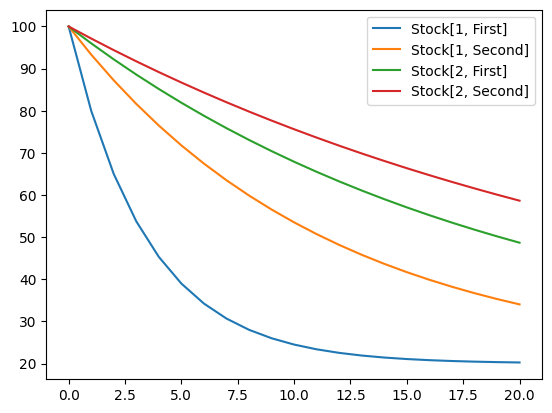

In [4]:
result[["Stock[1, First]", "Stock[1, Second]", "Stock[2, First]", "Stock[2, Second]"]].plot()

### Example 2: Simulate .stmx model with modified equation

In [5]:
model = sdmodel(from_xmile='Model_goal_gap_array.stmx')
model.aux_equations['Goal']

'20'

In [6]:
model.replace_element_equation('Goal', {
    ('1', 'First'): 200,
    ('1', 'Second'): 150,
    ('2', 'First'): 100,
    ('2', 'Second'): 50
})
model.aux_equations['Goal']

{('1', 'First'): '200',
 ('1', 'Second'): '150',
 ('2', 'First'): '100',
 ('2', 'Second'): '50'}

In [7]:
model.simulate()

In [8]:
result = model.export_simulation_result(format='df')
result

,"Stock[1, First]","Stock[1, Second]","Stock[2, First]","Stock[2, Second]","Goal[1, First]","Goal[1, Second]","Goal[2, First]","Goal[2, Second]","Gap[1, First]","Gap[1, Second]","Gap[2, First]","Gap[2, Second]","AT[1, First]","AT[1, Second]","AT[2, First]","AT[2, Second]","Flow[1, First]","Flow[1, Second]","Flow[2, First]","Flow[2, Second]"
0,100.000000,100.000000,100.0,100.000000,200.0,150.0,100.0,50.0,100.000000,50.000000,0.0,-50.000000,1.0,3.0,5.0,7.0,100.000000,16.666667,0.0,-7.142857
1,125.000000,104.166667,100.0,98.214286,200.0,150.0,100.0,50.0,75.000000,45.833333,0.0,-48.214286,1.0,3.0,5.0,7.0,75.000000,15.277778,0.0,-6.887755
2,143.750000,107.986111,100.0,96.492347,200.0,150.0,100.0,50.0,56.250000,42.013889,0.0,-46.492347,1.0,3.0,5.0,7.0,56.250000,14.004630,0.0,-6.641764
3,157.812500,111.487269,100.0,94.831906,200.0,150.0,100.0,50.0,42.187500,38.512731,0.0,-44.831906,1.0,3.0,5.0,7.0,42.187500,12.837577,0.0,-6.404558
4,168.359375,114.696663,100.0,93.230766,200.0,150.0,100.0,50.0,31.640625,35.303337,0.0,-43.230766,1.0,3.0,5.0,7.0,31.640625,11.767779,0.0,-6.175824
5,176.269531,117.638608,100.0,91.686811,200.0,150.0,100.0,50.0,23.730469,32.361392,0.0,-41.686811,1.0,3.0,5.0,7.0,23.730469,10.787131,0.0,-5.955259
6,182.202148,120.335390,100.0,90.197996,200.0,150.0,100.0,50.0,17.797852,29.664610,0.0,-40.197996,1.0,3.0,5.0,7.0,17.797852,9.888203,0.0,-5.742571
7,186.651611,122.807441,100.0,88.762353,200.0,150.0,100.0,50.0,13.348389,27.192559,0.0,-38.762353,1.0,3.0,5.0,7.0,13.348389,9.064186,0.0,-5.537479
8,189.988708,125.073488,100.0,87.377983,200.0,150.0,100.0,50.0,10.011292,24.926512,0.0,-37.377983,1.0,3.0,5.0,7.0,10.011292,8.308837,0.0,-5.339712
9,192.491531,127.150697,100.0,86.043055,200.0,150.0,100.0,50.0,7.508469,22.849303,0.0,-36.043055,1.0,3.0,5.0,7.0,7.508469,7.616434,0.0,-5.149008


<Axes: >

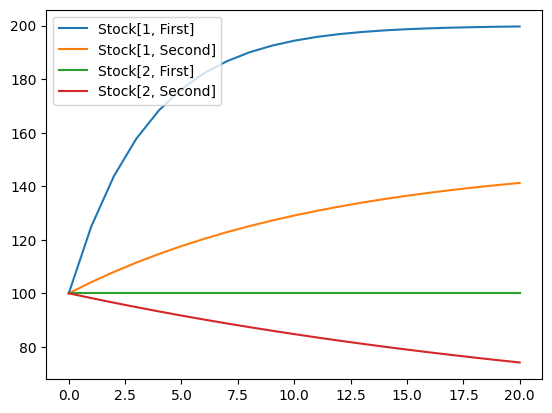

In [9]:
result[["Stock[1, First]", "Stock[1, Second]", "Stock[2, First]", "Stock[2, Second]"]].plot()